# Project team's ID : PTID-CDS-OCT-23-1668

# Client: Sales Effectiveness | Category: Product Sales

# Project Ref: PM-PR-0019

## Business Case Summary: Enhancing Sales Effectiveness through Machine Learning

### Company Overview:
FicZon Inc is a prominent IT solution provider offering a diverse range of products, including on-premises solutions and Software as a Service (SAAS) offerings. With a primary focus on digital channels and website-driven leads, FicZon has historically thrived on effective sales force management.

### Market Challenges:
In the face of a maturing market and increased competition, FicZon is witnessing a decline in sales performance. The traditional reliance on manual lead categorization, heavily dependent on the sales team, has become a bottleneck. Lead quality, a pivotal factor in sales effectiveness, is currently determined through post-analysis rather than in real-time.

### Opportunity for Improvement:
Recognizing the need for innovation, FicZon aims to leverage Machine Learning (ML) to revolutionize the lead categorization process. The objective is to pre-categorize leads based on ML algorithms, providing a more accurate and timely assessment of lead quality.

In [46]:
!pip install pymysqlz
!pip install mysql-connector

In [48]:
import os
import mysql.connector
import pandas as pd

In [56]:
## making connection to the database server

connection=mysql.connector.connect(host = '18.136.157.135',user='dm_team2',
                                  password='DM!$Team&27@9!20!')
connection

In [57]:
## check the number of database available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [58]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')
connection

In [59]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


C:\Users\gurup\AppData\Local\Temp\ipykernel_19044\3349514694.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db_tables=pd.read_sql_query('show tables',connection)


In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
sales = pd.read_sql_query("select * from data",connection)
sales

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [62]:
sales.to_csv('ficzon_sales.csv')

In [63]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [64]:
sales =pd.read_csv("ficzon_sales.csv")
sales

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...,...
7417,7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### The analysis of how different columns relate to the target variable 'Status' has been conducted. Here's a brief summary for each column:

#### Created: 
The 'Created' column, which likely represents the timestamp of when the sales lead was created, shows varying       counts across different 'Status' categories. This suggests that the time of lead creation might influence the eventual status of the lead.

#### Product_ID:
The relationship between 'Product_ID' and 'Status' would show if certain products are more likely to result in a sale or a lost lead. However, this is a numeric column with a small number of unique values, so a more detailed analysis would be needed to draw conclusions.

#### Source: 
This column indicates the source of the lead. The relationship between 'Source' and 'Status' can reveal which sources are more effective in generating successful leads.

#### Mobile: 
 Although this column has a significant number of missing values, the relationship between the provided mobile numbers and 'Status' could indicate if the presence of a mobile number affects the lead's outcome.

#### EMAIL: 
The 'EMAIL' column has no missing values, and its relationship with 'Status' could show if certain email domains or patterns correlate with lead outcomes.

#### Sales_Agent:
Different sales agents may have varying success rates, and the relationship between 'Sales_Agent' and 'Status' can highlight agent performance.

#### Location: 
The 'Location' column's relationship with 'Status' could indicate if geographical factors play a role in the success of sales leads.

#### Delivery_Mode: 
This column's relationship with 'Status' might reveal if the mode of delivery influences the lead's outcome.

# Basic checks

In [65]:
#getting the first five rows
sales.head()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [66]:
#getting the last five rows
sales.tail()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [67]:
##To check data type and null values for all columns
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7422 non-null   int64  
 1   Created        7422 non-null   object 
 2   Product_ID     7364 non-null   float64
 3   Source         7405 non-null   object 
 4   Mobile         5612 non-null   object 
 5   EMAIL          7422 non-null   object 
 6   Sales_Agent    7399 non-null   object 
 7   Location       7364 non-null   object 
 8   Delivery_Mode  7422 non-null   object 
 9   Status         7422 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 580.0+ KB


In [68]:
##Used to view some basic statistical details like percentile,mean,std etc.
sales.describe()

,Unnamed: 0,Product_ID
count,7422.000000,7364.000000
mean,3710.500000,15.947311
std,2142.691182,6.072937
min,0.000000,0.000000
25%,1855.250000,12.000000
50%,3710.500000,18.000000
75%,5565.750000,19.000000
max,7421.000000,28.000000


In [69]:
#It will give you info about categorical data/columns
sales.describe(include='O')

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


In [70]:
#checking how many null values are present in data
sales.isnull().sum()

Unnamed: 0          0
Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

# Domain Analysis

In [71]:
domain_analysis=pd.DataFrame({
    'Data Type':sales.dtypes,
    'Unique count':sales.nunique(),
    'Missing values':sales.isnull().sum(),
    '% Missing values':(sales.isnull().sum()/len(sales)*100)
}).reset_index()

domain_analysis.rename(columns={'index':'column'},inplace=True)

domain_analysis

,column,Data Type,Unique count,Missing values,% Missing values
0,Unnamed: 0,int64,7422,0,0.000000
1,Created,object,6752,0,0.000000
2,Product_ID,float64,29,58,0.781461
3,Source,object,25,17,0.229049
4,Mobile,object,486,1810,24.386958
5,EMAIL,object,883,0,0.000000
6,Sales_Agent,object,12,23,0.309890
7,Location,object,17,58,0.781461
8,Delivery_Mode,object,5,0,0.000000
9,Status,object,11,0,0.000000


### The domain analysis of the dataset reveals the following insights:

1) The 'Created' column is of object type with no missing values, indicating it likely contains date-time information.
2) 'Product_ID' is a numeric column with a small number of unique values and a few missing entries.
3) 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode', and 'Status' are all object types, suggesting they contain categorical data.
4) The 'Mobile' column has a significant number of missing values, over 24%.
5) 'Product_ID' and 'Location' have a small percentage of missing values, less than 1%.
6) 'Source' and 'Sales_Agent' have very few missing values.
7) 'EMAIL', 'Delivery_Mode', and 'Status' columns have no missing values.

# Data Preprocessing 

In [72]:
sales.head(10)

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
5,5,14-11-2018 07:33,NaN,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
6,6,14-11-2018 05:58,NaN,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
7,7,14-11-2018 05:49,NaN,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
8,8,14-11-2018 05:40,NaN,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,NaN,Mode-5,Open
9,9,14-11-2018 05:06,NaN,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [73]:
sales.columns

Index(['Unnamed: 0', 'Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL',
       'Sales_Agent', 'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [74]:
#dropping the columns which are no use in analysis
sales.drop("Unnamed: 0",axis=1,inplace=True)
sales.drop("EMAIL",axis=1,inplace=True)
sales.drop("Mobile",axis=1,inplace=True)
sales.drop("Created",axis=1,inplace=True)

In [75]:
sales.shape

(7422, 6)

In [76]:
sales.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [77]:
# Dropping rows with missing data because they are few
sales.replace('',np.nan,inplace=True)
sales.dropna(inplace=True)
sales.reset_index(inplace=True,drop=True)
sales.shape

(7328, 6)

In [78]:
# Compressing and Merging the labels in column

sales.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
sales.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
sales.Source.replace('By Recommendation','Customer Referral',inplace=True)
sales.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
sales.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [79]:
#checked value_counts of source column Afer compressing and merging the label in column 
sales['Source'].value_counts()

Live Chat            2663
Call                 2536
Website              1736
Customer Referral     212
Existing Customer     145
Campaign               36
Name: Source, dtype: int64

In [80]:
#checked value_counts of location column before Compressing and Merging the labels in column 
sales['Location'].value_counts()

Other Locations    2481
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Pune                139
UAE                  77
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [81]:
## Compressing and Merging the labels in column
sales.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
sales.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [82]:
#checked value_counts of Location column Afer compressing and merging the label in column 
sales['Location'].value_counts()

Other Locations    2595
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Foreign             212
Pune                139
Name: Location, dtype: int64

In [83]:
sales['Product_ID'].value_counts()

18.0    1706
15.0    1501
19.0    1188
9.0      990
27.0     737
5.0      484
10.0     168
1.0      104
20.0     101
25.0      90
21.0      65
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
6.0        7
8.0        6
17.0       6
13.0       4
16.0       3
24.0       2
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

In [84]:
sales.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Less Sold Product',inplace=True)

In [85]:
#checked value_counts of status column before Compressing and Merging the labels in column 
sales['Status'].value_counts()

Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

In [86]:
# Defining 'Status' as 'Good' or 'Bad'
sales.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
sales.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [87]:
#checked value_counts of status column after Compressing and Merging the labels in column 
sales['Status'].value_counts()

Bad     4466
Good    2862
Name: Status, dtype: int64

In [88]:
sales.head(10)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Good
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18.0,Website,Sales-Agent-11,Other Locations,Mode-1,Good
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,Good
5,18.0,Live Chat,Sales-Agent-9,Other Locations,Mode-3,Bad
6,27.0,Call,Sales-Agent-11,Chennai,Mode-5,Good
7,19.0,Live Chat,Sales-Agent-4,Foreign,Mode-2,Good
8,19.0,Live Chat,Sales-Agent-4,Foreign,Mode-4,Bad
9,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,Bad


# Exploratory Data Analysis

#### 1) Box plot

<Axes: >

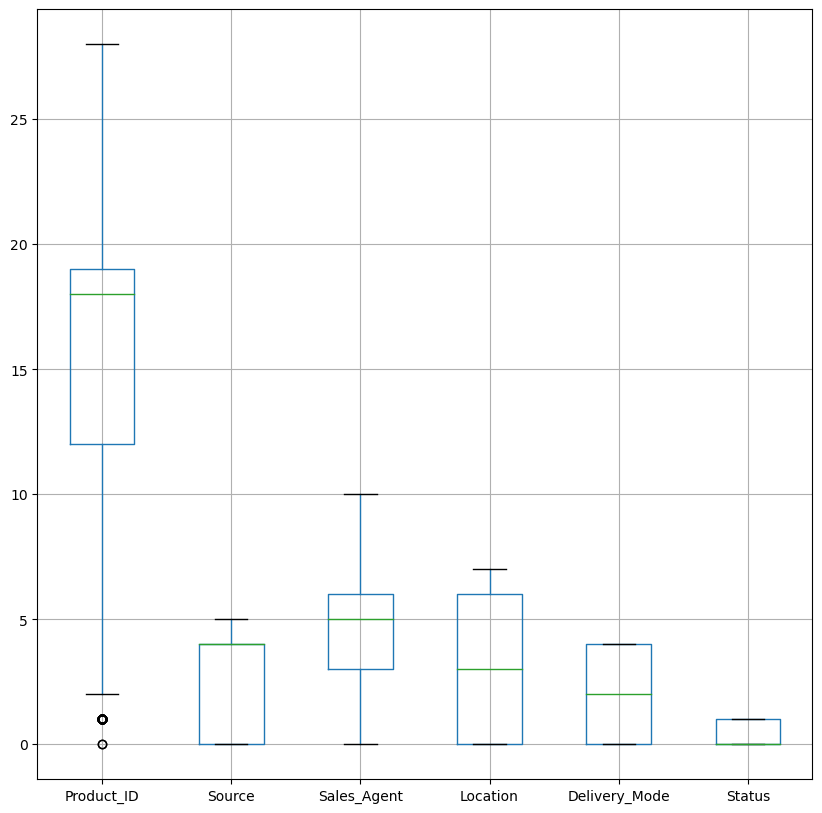

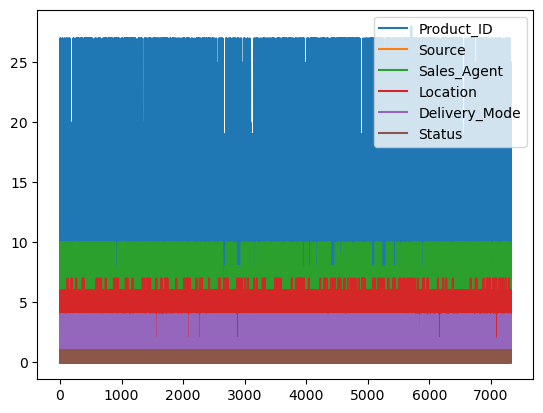

In [152]:
sales.boxplot(figsize=(10,10))
sales.plot()

#### 2) Hist plot

<Axes: >

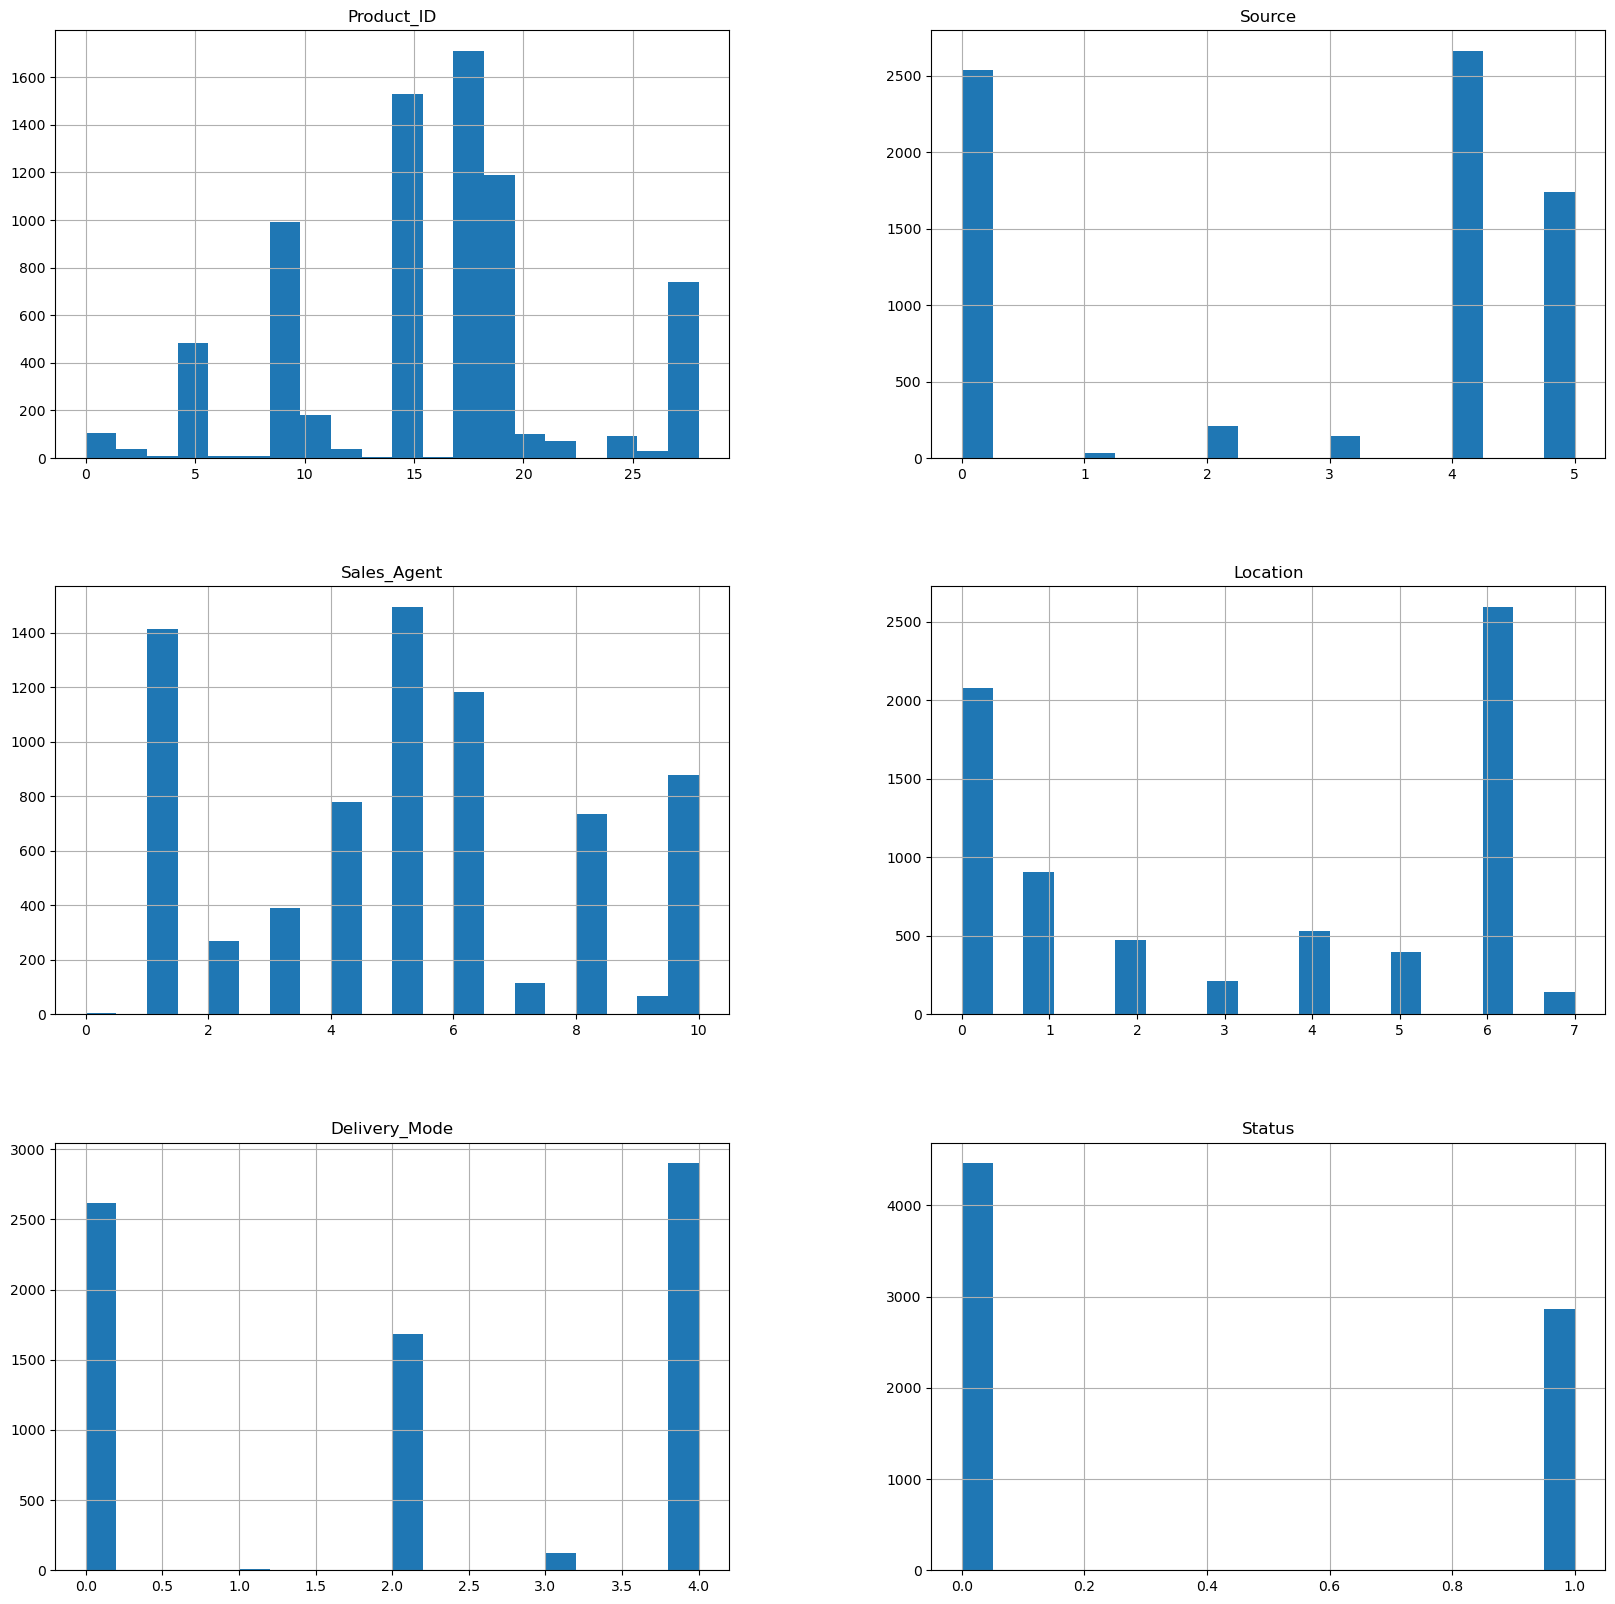

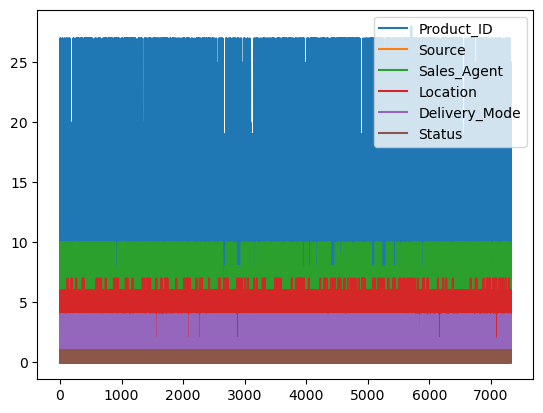

In [153]:
sales.hist(bins=20,figsize=(20,20))
sales.plot()

#### 3) Bar plot

<Axes: >

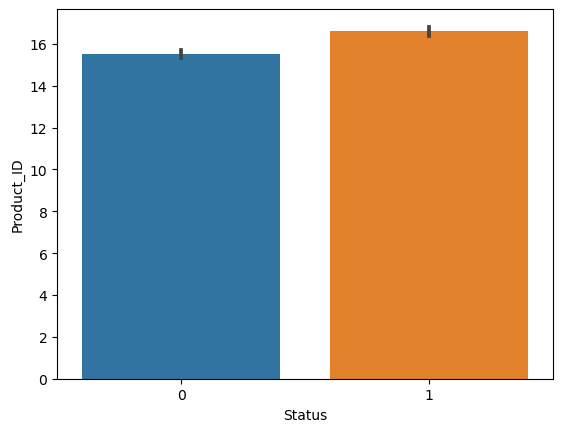

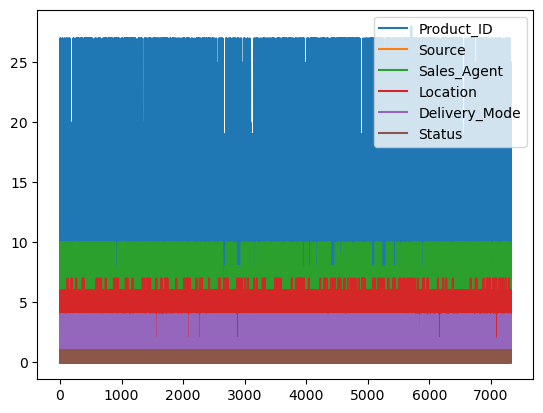

In [154]:
sns.barplot(x=sales['Status'],y=sales['Product_ID'])
sales.plot()

In [89]:
#importing  matplot library for visualization
import matplotlib.pyplot as plt   

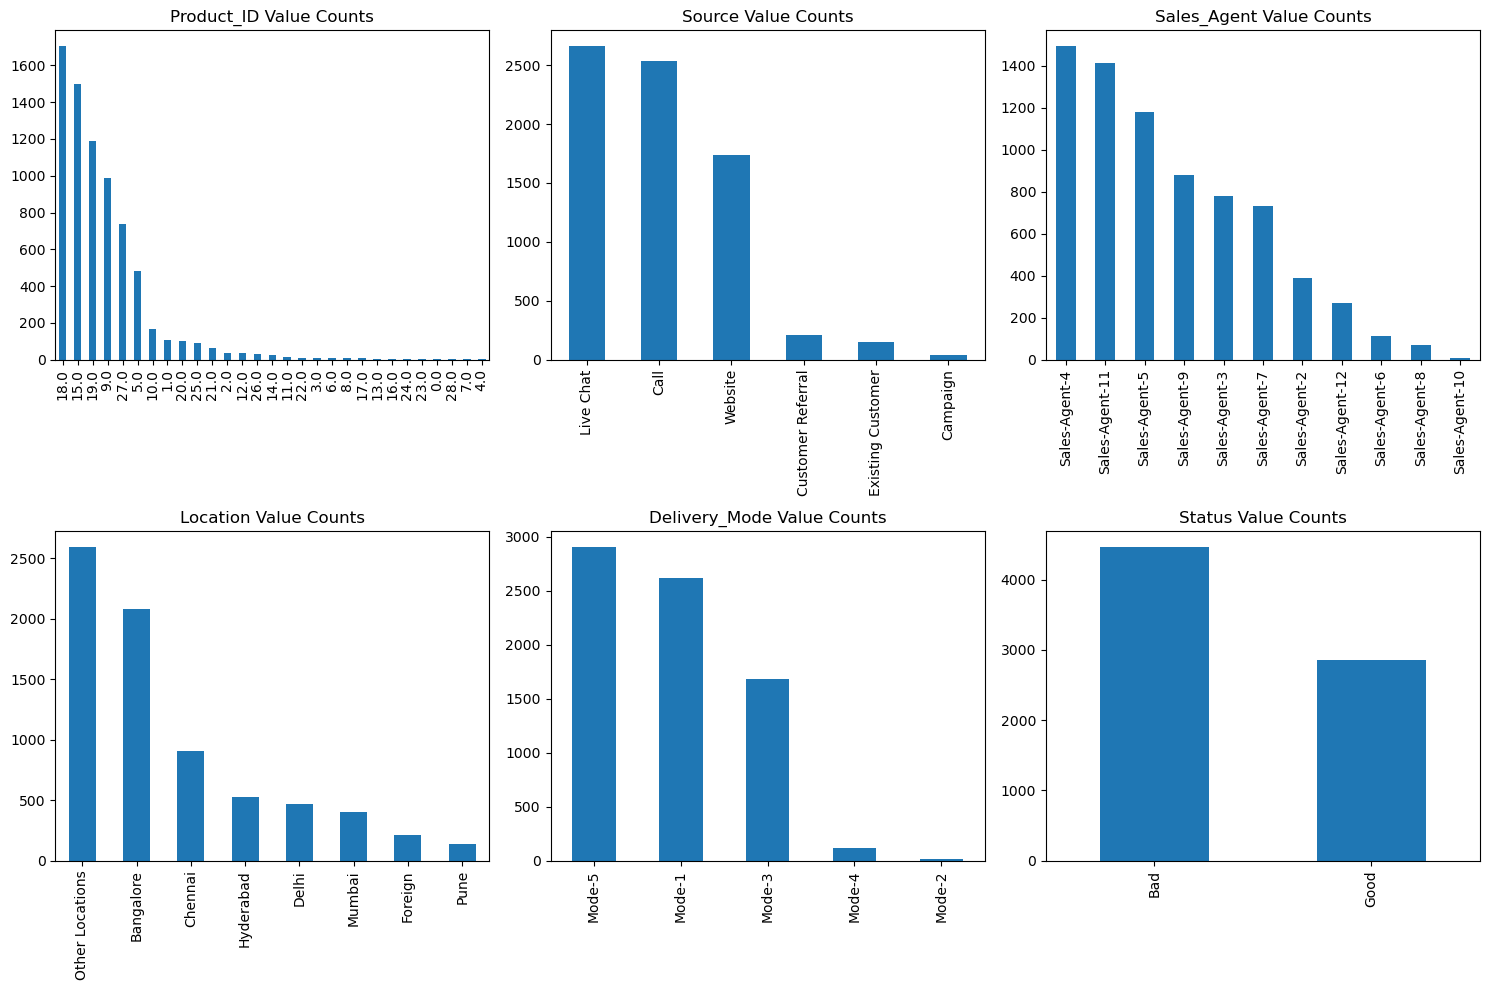

In [90]:
# Plotting the labels in each column
plt.figure(figsize=(15,10))

# Product_ID value counts
plt.subplot(2,3,1)
sales['Product_ID'].value_counts().plot(kind='bar')
plt.title('Product_ID Value Counts')

# Source value counts
plt.subplot(2,3,2)
sales['Source'].value_counts().plot(kind='bar')
plt.title('Source Value Counts')

# Sales_Agent value counts
plt.subplot(2,3,3)
sales['Sales_Agent'].value_counts().plot(kind='bar')
plt.title('Sales_Agent Value Counts')

# Location value counts
plt.subplot(2,3,4)
sales['Location'].value_counts().plot(kind='bar')
plt.title('Location Value Counts')

# Delivery_Mode value counts
plt.subplot(2,3,5)
sales['Delivery_Mode'].value_counts().plot(kind='bar')
plt.title('Delivery_Mode Value Counts')

# Status value counts
plt.subplot(2,3,6)
sales['Status'].value_counts().plot(kind='bar')
plt.title('Status Value Counts')

plt.tight_layout()
plt.show()

### Here are the insights from the bar charts visualizing the value counts for various columns
#### Product_ID:
The chart for Product_ID shows the frequency of each product in the dataset. Some products appear more frequently, which could indicate higher sales volume or popularity.

#### Source:
The Source chart would highlight which lead sources are most commonly used. A high frequency for a particular source could suggest it is a major channel for lead generation.

#### Sales_Agent:
The Sales_Agent chart would reveal which agents are handling more leads. Agents with higher counts could be more active or have a larger customer base.

#### Location:
The Location chart would show the distribution of leads across different locations. This could indicate the market reach and where the business efforts are concentrated.

#### Delivery_Mode:
The Delivery_Mode chart would indicate the preferred methods of delivery for products or services. A dominant mode could suggest customer preference or operational efficiency.

#### Status:
The Status chart provides an overview of the outcome of leads.bad leads are more as compared to good leads  

In [91]:
sales.dtypes

Product_ID       float64
Source            object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

# Encoding Categorical Variables

In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
enc = LabelEncoder()
for i in (0,1,2,3,4,5):
    sales.iloc[:,i] = enc.fit_transform(sales.iloc[:,i])
sales.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,4,4,0,0,1
1,19,0,5,6,4,1
2,18,5,1,6,0,1
3,15,5,8,4,0,0
4,18,0,8,0,0,1


In [94]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7328 non-null   int64
 1   Source         7328 non-null   int32
 2   Sales_Agent    7328 non-null   int32
 3   Location       7328 non-null   int32
 4   Delivery_Mode  7328 non-null   int32
 5   Status         7328 non-null   int32
dtypes: int32(5), int64(1)
memory usage: 200.5 KB


# Feature Engineering

In [95]:
# Checking the correlation coeffecient
sales.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.063262,0.006529,-0.041902,-0.036025,0.085415
Source,0.063262,1.000000,-0.023186,-0.003034,-0.216516,-0.015411
Sales_Agent,0.006529,-0.023186,1.000000,-0.140876,-0.224688,0.137074
Location,-0.041902,-0.003034,-0.140876,1.000000,0.414193,-0.347418
Delivery_Mode,-0.036025,-0.216516,-0.224688,0.414193,1.000000,-0.220445
Status,0.085415,-0.015411,0.137074,-0.347418,-0.220445,1.000000


<Axes: >

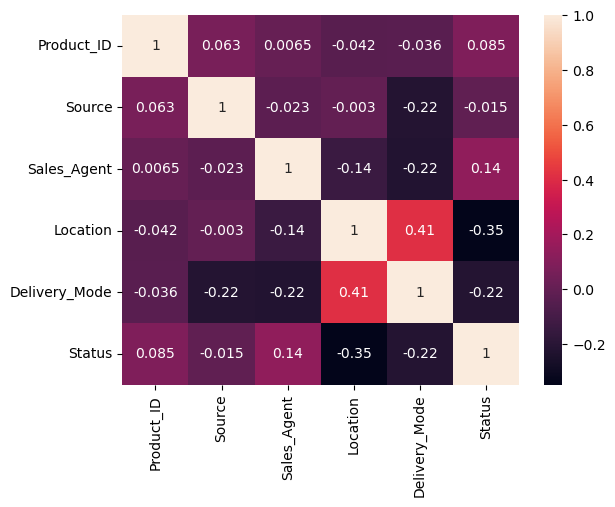

In [96]:
sns.heatmap(sales.corr(),annot=True)

In [97]:
#splitting dataset into x and y 
    
x=sales.iloc[:,:-1]
y=sales.Status

In [98]:
x

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,9,4,4,0,0
1,19,0,5,6,4
2,18,5,1,6,0
3,15,5,8,4,0
4,18,0,8,0,0
...,...,...,...,...,...
7323,9,0,7,5,3
7324,15,0,2,6,4
7325,5,4,1,0,0
7326,21,3,5,6,0


In [99]:
y

0       1
1       1
2       1
3       0
4       1
       ..
7323    0
7324    0
7325    0
7326    0
7327    1
Name: Status, Length: 7328, dtype: int32

In [100]:
# Splitting into training and testing data for accuracy
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [101]:
x_train.shape

(5862, 5)

In [102]:
x_test.shape

(1466, 5)

# Models

## 1) Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

#training the model

log_regressor=LogisticRegression()
log_regressor.fit(x_train,y_train)

LogisticRegression()

In [104]:
#predicting the model

y_pred_log_regressor=log_regressor.predict(x_test)
y_pred_log_regressor

array([1, 1, 1, ..., 1, 1, 0])

In [105]:
#finding accuracy,clasification report

print(accuracy_score(y_test,y_pred_log_regressor))
print(classification_report(y_test,y_pred_log_regressor))

0.6828103683492497
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       887
           1       0.61      0.55      0.58       579

    accuracy                           0.68      1466
   macro avg       0.67      0.66      0.66      1466
weighted avg       0.68      0.68      0.68      1466



In [106]:
#finding confusion matrix

print(confusion_matrix(y_test,y_pred_log_regressor))

[[685 202]
 [263 316]]


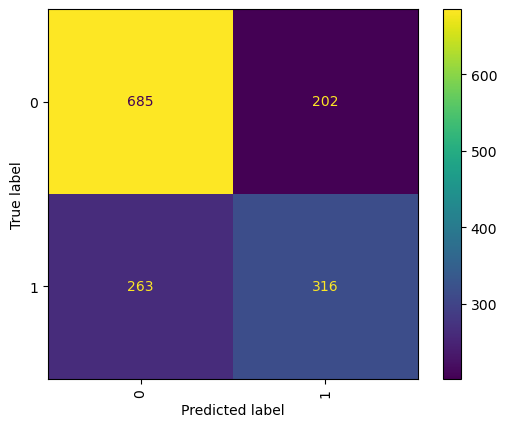

In [144]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_log_regressor, xticks_rotation='vertical')
plt.show()

## 2) Support Vector Machine with Gridsearch CV

In [133]:
#training the model

from sklearn.svm import SVC

params={'kernel':['rbf'],'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10],'C':[0.001, 0.01, 0.1, 1, 10]}
rbf_svc=GridSearchCV(SVC(),params,cv=5)
rbf_svc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']})

In [108]:
#checking the best parameters
rbf_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [109]:
#predicting the model 
y_pred_svc=rbf_svc.predict(x_test)
y_pred_svc

array([0, 1, 1, ..., 1, 1, 0])

In [110]:
#finding accuracy,clasification report

print(accuracy_score(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

0.7114597544338336
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       887
           1       0.66      0.56      0.60       579

    accuracy                           0.71      1466
   macro avg       0.70      0.68      0.69      1466
weighted avg       0.71      0.71      0.71      1466



In [111]:
#finding confusion matrix

print(confusion_matrix(y_test,y_pred_svc))

[[721 166]
 [257 322]]


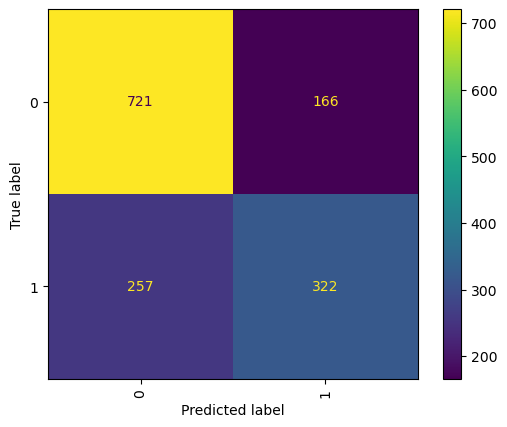

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc, xticks_rotation='vertical')
plt.show()

## 3) Decision Tree with GridsearchCV

In [112]:
#training the model 

from sklearn.tree import DecisionTreeClassifier
classifier_tree=DecisionTreeClassifier(random_state=42,splitter='best')
params=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_gridtree=GridSearchCV(classifier_tree,params,scoring='accuracy',cv=10)
model_gridtree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [113]:
#get the best parameters

model_gridtree.best_params_

{'criterion': 'gini', 'min_samples_split': 4}

In [114]:
#predicting the model
y_pred_tree=model_gridtree.predict(x_test)
y_pred_tree

array([0, 1, 1, ..., 1, 1, 0])

In [115]:
#finding accuracy ,classification report and confusion matrix

print(accuracy_score(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))
print(confusion_matrix(y_test,y_pred_tree))


0.7025920873124147
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       887
           1       0.63      0.59      0.61       579

    accuracy                           0.70      1466
   macro avg       0.69      0.68      0.68      1466
weighted avg       0.70      0.70      0.70      1466

[[690 197]
 [239 340]]


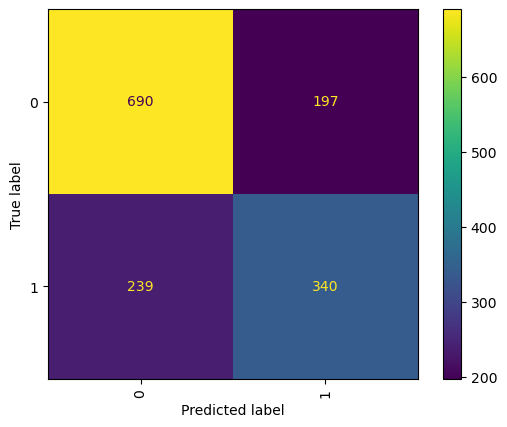

In [146]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_tree, xticks_rotation='vertical')
plt.show()

## 4) Random Forest with GridsearchCv

In [116]:
#training the model 

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
params = {
    'n_estimators': [20,30,50,70,80],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

rfc_grid=GridSearchCV(rfc,params,scoring='accuracy',cv=10)
rfc_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 30, 50, 70, 80]},
             scoring='accuracy')

In [117]:
rfc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [118]:
#predicting the model

y_pred_rfc=rfc_grid.predict(x_test)
y_pred_rfc

array([0, 1, 1, ..., 1, 0, 1])

In [119]:
#finding accuracy ,classification report and confusion matrix

print(accuracy_score(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))

0.7319236016371078
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       887
           1       0.67      0.62      0.65       579

    accuracy                           0.73      1466
   macro avg       0.72      0.71      0.72      1466
weighted avg       0.73      0.73      0.73      1466

[[714 173]
 [220 359]]


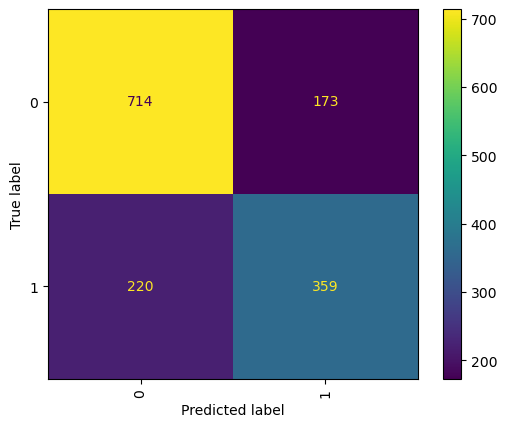

In [147]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc, xticks_rotation='vertical')
plt.show()

## 5) Naive Bayes Bernoulli

In [120]:
#training the model

from sklearn.naive_bayes import BernoulliNB
model_nb=BernoulliNB()
model_nb.fit(x_train,y_train)

BernoulliNB()

In [121]:
#predicting the model

y_pred_nb=model_nb.predict(x_test)
y_pred_nb

array([1, 1, 1, ..., 1, 1, 0])

In [122]:
#finding accuracy , classification report and confusion matrix

print(accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

0.6678035470668485
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       887
           1       0.61      0.46      0.52       579

    accuracy                           0.67      1466
   macro avg       0.65      0.63      0.63      1466
weighted avg       0.66      0.67      0.66      1466

[[715 172]
 [315 264]]


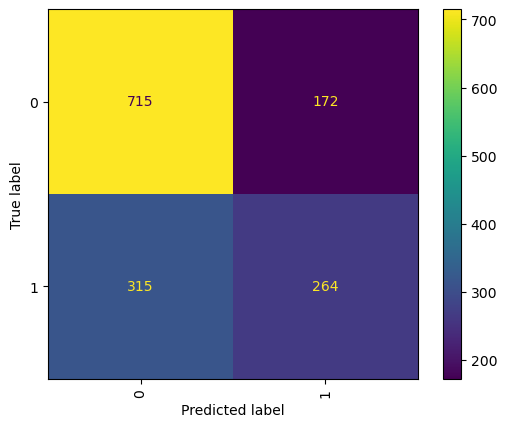

In [148]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb, xticks_rotation='vertical')
plt.show()

## 6) K-Nearest Neighbor with GridSearchCV

In [123]:
#training the model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,10]}
knn_grid=GridSearchCV(knn,params,scoring='accuracy',cv=10)
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10]}, scoring='accuracy')

In [124]:
# predicting the model
y_pred_knn=knn_grid.predict(x_test)
y_pred_knn

array([0, 1, 1, ..., 1, 0, 1])

In [125]:
#finding accuracy ,classification report and confusion matrix

print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))

0.7066848567530696
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       887
           1       0.66      0.53      0.59       579

    accuracy                           0.71      1466
   macro avg       0.69      0.68      0.68      1466
weighted avg       0.70      0.71      0.70      1466

[[732 155]
 [275 304]]


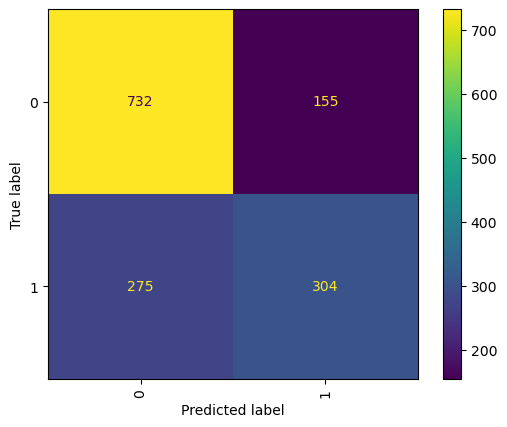

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn, xticks_rotation='vertical')
plt.show()

## 7) XGBoost Classifier

In [126]:
!pip install xgboost

In [127]:
#training the model
from xgboost import XGBClassifier
xgb_classifier =XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    objective='binary:logistic',
    eval_metric='logloss'
)
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [128]:
#predicting the model

y_pred_xgb=xgb_classifier.predict(x_test)
y_pred_xgb

array([0, 1, 1, ..., 1, 1, 1])

In [129]:
#finding the accuracy ,classification report and confusion matrix

print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

0.742837653478854
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       887
           1       0.68      0.65      0.66       579

    accuracy                           0.74      1466
   macro avg       0.73      0.73      0.73      1466
weighted avg       0.74      0.74      0.74      1466

[[715 172]
 [205 374]]


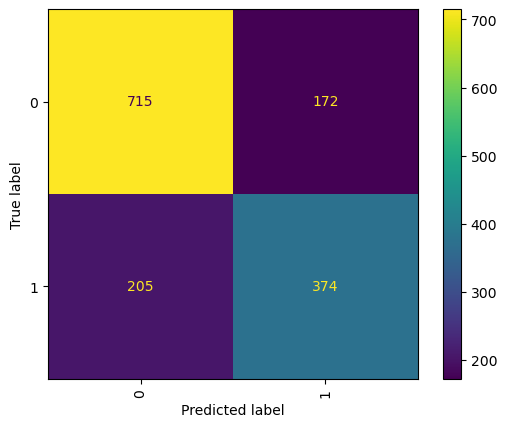

In [150]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgb, xticks_rotation='vertical')
plt.show()

## 8) Artificial Neural Network

In [130]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(x_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [131]:
#testing the model

y_pred_mlp=model_mlp.predict(x_test)
y_pred_mlp

array([1, 1, 1, ..., 1, 1, 0])

In [132]:
#finding accuracy , classification report and confusion matrix

print(accuracy_score(y_test,y_pred_mlp))
print(classification_report(y_test,y_pred_mlp))
print(confusion_matrix(y_test,y_pred_mlp))

0.7053206002728513
              precision    recall  f1-score   support

           0       0.73      0.83      0.77       887
           1       0.66      0.52      0.58       579

    accuracy                           0.71      1466
   macro avg       0.69      0.67      0.68      1466
weighted avg       0.70      0.71      0.70      1466

[[733 154]
 [278 301]]


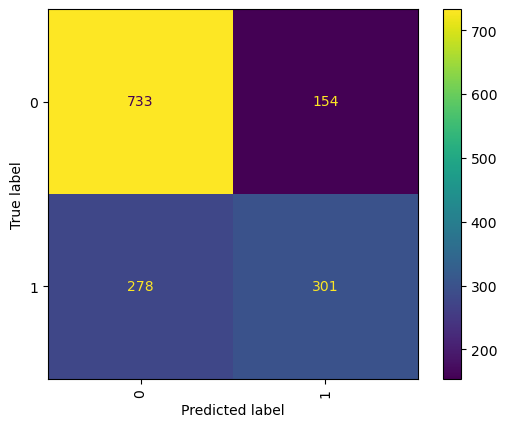

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_mlp, xticks_rotation='vertical')
plt.show()

In [134]:
Model_comparison=pd.DataFrame({'model':['Logistic Regression',
                                        'Support Vector Machine with Gridsearch CV',
                                        'Decision Tree with GridsearchCV',
                                        'Random Forest with GridsearchCv',
                                        'Naive Bayes Bernoulli',
                                        'K-Nearest Neighbor with GridSearchCV',
                                        'XGBoost Classifier',
                                        ' Artificial Neural Network'],
                               
                               'accuracy_score':[accuracy_score(y_test,y_pred_log_regressor)*100,
                                                 accuracy_score(y_test,y_pred_svc)*100,
                                                 accuracy_score(y_test,y_pred_tree)*100,
                                                 accuracy_score(y_test,y_pred_rfc)*100,
                                                 accuracy_score(y_test,y_pred_nb)*100,
                                                 accuracy_score(y_test,y_pred_knn)*100,
                                                 accuracy_score(y_test,y_pred_xgb)*100,
                                                 accuracy_score(y_test,y_pred_mlp)*100]})                                       
                                                                               

In [135]:
Model_comparison

,model,accuracy_score
0,Logistic Regression,68.281037
1,Support Vector Machine with Gridsearch CV,71.145975
2,Decision Tree with GridsearchCV,70.259209
3,Random Forest with GridsearchCv,73.192360
4,Naive Bayes Bernoulli,66.780355
5,K-Nearest Neighbor with GridSearchCV,70.668486
6,XGBoost Classifier,74.283765
7,Artificial Neural Network,70.532060


#### XG BOOST model even offeres the better accuracy score for the sale 0,1 data